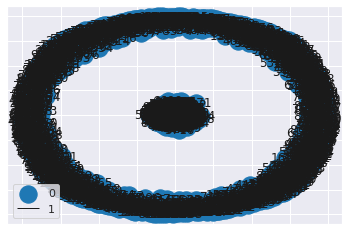

In [53]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
sns.set()

def _random_subset(seq, m, rng):
    """Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.

    Note: rng is a random.Random or numpy.random.RandomState instance.
    """
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        targets.add(x)
    return targets
def preferential_attachment(n, m, seed=None, initial_graph=None):
    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Preferential_attachment_graph network must have m >= 1 and m < n, m = {m}, n = {n}"
        )
    if initial_graph is None:
        # Default initial graph : star graph on (m + 1) nodes
        G = nx.star_graph(m)
    else:
        if 2*len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(
                f"Preferential_attachment_graph initial graph needs between m={m} and n={n} nodes"
            )
        G = initial_graph.copy()
    repeated_nodes = [n for n, d in G.degree() for _ in range(d)]
    source = len(G)
    k=int(m/2)
    while source < n:
        if source==n-1:
            k=5
            targets = _random_subset(repeated_nodes, k, seed)
            G.add_edges_from(zip([source] * k, targets))
            repeated_nodes.extend(targets)
            repeated_nodes.extend([source] * k)
            break
        targets = _random_subset(repeated_nodes, k, seed)
        G.add_edges_from(zip([source] * k, targets))
        if k==0:
            G.add_node(source)
        repeated_nodes.extend(targets)
        targets = _random_subset(repeated_nodes, (m-k), seed)
        G.add_edges_from(zip([source+1] * (m-k), targets))
        if k==m:
            G.add_node(source+1)
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * k)
        repeated_nodes.extend([source+1] * (m-k))
        k=random.choice(range(m+1))

        source += 2
    return G

node = 10000
m = 5
init_graph = nx.complete_graph(3)
G = preferential_attachment(node, m, initial_graph = init_graph)
ans = nx.to_numpy_array(G)
nx.draw_networkx(G)
plt.legend(G)
plt.show()

Average degree is :  4.9996


/home/zed/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


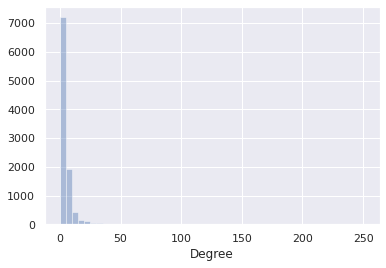

In [54]:
degrees = pd.DataFrame(G.degree(), columns=['Node','Degree'])
sns.distplot(a=degrees['Degree'], kde=False)
print("Average degree is : ",ans.sum() / node)

Average clustering is :  0.005032615463697042


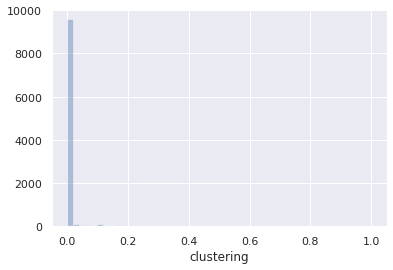

In [55]:
ans_arr = np.array(list(nx.clustering(G).items()))
cluster_ans = pd.DataFrame(ans_arr, columns = ['Node','clustering'])
sns.distplot(a = cluster_ans['clustering'], kde = False)
print("Average clustering is : ",nx.average_clustering(G))

<AxesSubplot:xlabel='betweenness'>

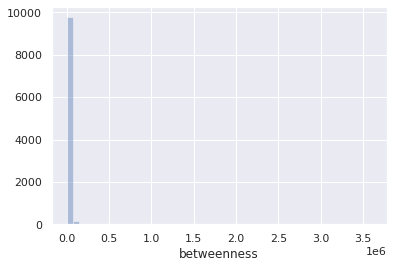

In [56]:
ans_arr = np.array(list(nx.betweenness_centrality(G, normalized=False).items()))
between_ans = pd.DataFrame(ans_arr, columns = ['Node','betweenness'])
sns.distplot(a = between_ans['betweenness'], kde = False)